## Librerias

In [1]:
# Libraries which will help us to manipulate a lil bit more our data
import numpy as np
import pandas as pd

# Sklearn: Library for Train/Test Split // confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

# TensorFlow: Library for model training
import tensorflow as tf

# Matplotlib: Library for plotting
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Functions: Library which contains all the functions that we'll use
import functions as fn

# Functions: Library which contains all the visualizations that we'll plot
import visualizations as vz

<font color = 'blue'>Cargar datos

In [2]:
df = pd.read_parquet('Data_new_outliers.parquet')
# df.drop(columns=[''], inplace = True)

# Guardar en una variable el nombre de nuestra variable objetivo
target_variable ='outlier'

<font color = 'blue'> Observar el balanceo inicial de nuestros datos

La clase de NO outliers tiene 887167
La clase de Outliers tiene 39122


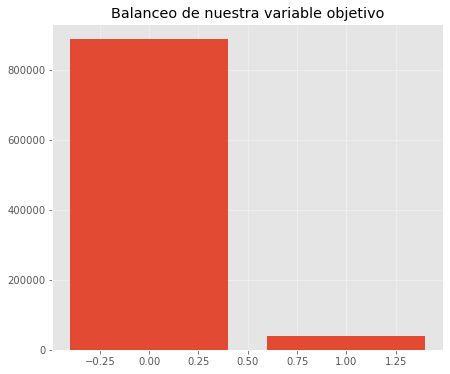

In [3]:
vz.balancing(df,target_variable)

## Balanceo de datos

#### Subsampling

In [4]:
df_subsampling_balance = fn.subsampling(df,target_variable).copy()

clase 0 balanceada


La clase de NO outliers tiene 39122
La clase de Outliers tiene 39122


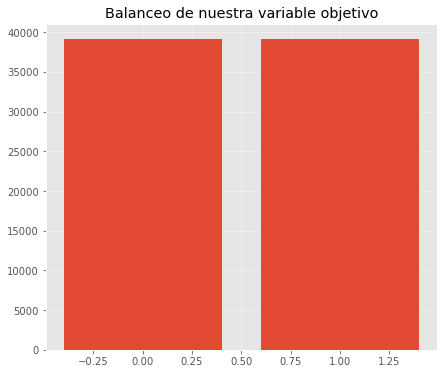

In [5]:
vz.balancing(df_subsampling_balance)

In [6]:
# Aquí guardaremos el df balanceado 
df = df_subsampling_balance.copy()
df = df.select_dtypes(exclude=['object'])

## Train/Test Split

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(target_variable, axis=1)
y = df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, random_state=42
)

## Data Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Defining a neural network structure

<font color = 'blue'>The initial structure was chosen randomly so we will be making some adjustments to it.

In [9]:
tf.random.set_seed(17)
n_epochs = 10


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=n_epochs)

C:\Users\tonat\anaconda2020\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
1957/1957 [==============================] - 10s 4ms/step - loss: 0.3555 - accuracy: 0.8811 - precision: 0.8130 - recall: 0.9907 - auc: 0.9207
Epoch 2/10
1957/1957 [==============================] - 7s 3ms/step - loss: 0.4106 - accuracy: 0.8779 - precision: 0.8042 - recall: 0.9999 - auc: 0.8847
Epoch 3/10
1957/1957 [==============================] - 6s 3ms/step - loss: 0.3628 - accuracy: 0.8646 - precision: 0.7874 - recall: 0.9998 - auc: 0.8832
Epoch 4/10
1957/1957 [==============================] - 6s 3ms/step - loss: 0.3076 - accuracy: 0.8813 - precision: 0.8086 - recall: 1.0000 - auc: 0.8809
Epoch 5/10
1957/1957 [==============================] - 6s 3ms/step - loss: 0.2942 - accuracy: 0.8867 - precision: 0.8157 - recall: 1.0000 - auc: 0.8858
Epoch 6/10
1957/1957 [==============================] - 7s 4ms/step - loss: 0.2867 - accuracy: 0.8911 - precision: 0.8215 - recall: 1.0000 - auc: 0.8909
Epoch 7/10
1957/1957 [==============================] - 7s 4ms/step - loss: 0.286

## Visualize Performance

In [10]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

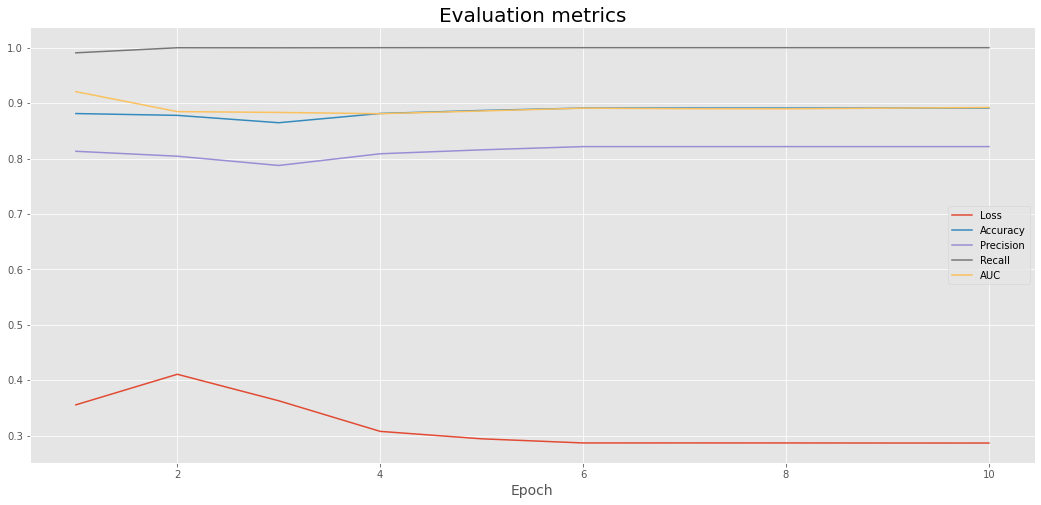

In [11]:
vz.evaluation_metrics(history,n_epochs)

## Making predictions

In [12]:
predictions = model.predict(X_test_scaled)

490/490 [==============================] - 1s 2ms/step


<font color = 'blue'>We need to choose a threshold which is going to be the probability that we'll chose in order to say that a price is an outlier or no

In [13]:
threshold = .5

prediction_classes = [
    1 if prob > threshold else 0 for prob in np.ravel(predictions)
]

In [14]:
predictions

array([[0.83891284],
       [0.83891284],
       [0.83891284],
       ...,
       [0.83891284],
       [0.83891284],
       [0.        ]], dtype=float32)

## Model Evaluation on Test Data

<font color = 'blue'> Confusion Matrix

Legitimate NO_Outliers Detected (True Negatives):  6174
Legitimate NO_Outliers Incorrectly Detected (False Positives):  1733
Outliers Missed (False Negatives):  1
Outliers Detected (True Positives):  7741
Total Outliers:  7742
Total No_Outliers:  7907


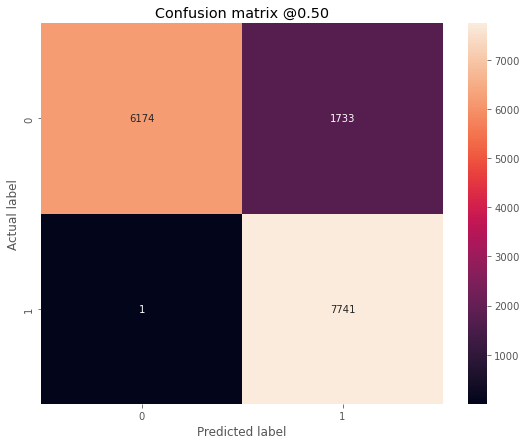

In [15]:
vz.plot_cm(y_test, prediction_classes,threshold)

<font color = 'blue'> Evaluation Metrics

In [16]:
print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.89
Precision: 0.82
Recall: 1.00
